# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [202]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
#import datetime
import os
import csv


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [203]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [204]:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
        
        

'http://api.openweathermap.org/data/2.5/weather?appid=8ef7960e4b4ab5cd6cc11c76b8226720&units=metric&q='

In [205]:
response = requests.get(query_url +'georgetown').json()
#response
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 5.41, 'lon': 100.34},
 'dt': 1595392523,
 'id': 1735106,
 'main': {'feels_like': 33.61,
          'humidity': 83,
          'pressure': 1010,
          'temp': 28.47,
          'temp_max': 29,
          'temp_min': 27.78},
 'name': 'George Town',
 'sys': {'country': 'MY',
         'id': 9429,
         'sunrise': 1595373201,
         'sunset': 1595417789,
         'type': 1},
 'timezone': 28800,
 'visibility': 7000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 2.1}}


In [206]:
# set up lists to hold reponse info

record_count = 1
#count_city = []
city_weather_data = []
print('Beginning Data Retrieval')
print('--------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name = response['name']
        city_country=response['sys']['country']
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_date = response['dt']
        #city_date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Data dictionary of weather data
        city_weather_data.append({'City':city_name, 
                          'Country': city_country, 
                          'Latitude': city_lat, 
                          'Longitude': city_lon,
                          'Max Temperature': city_max_temp,
                          'Humidity': city_humidity, 
                          'Cloudiness': city_cloudiness, 
                          'Wind Speed': city_wind_speed,
                          'Date': city_date})
        
        
        print(f'Processing Record {record_count}| {city}')
        record_count+= 1
    except:
        print(f'City not found. Skipping...')
        


Beginning Data Retrieval
--------------------------
City not found. Skipping...
Processing Record 1| ixtapa
Processing Record 2| esperance
Processing Record 3| mtimbira
Processing Record 4| rikitea
Processing Record 5| tasiilaq
Processing Record 6| constitucion
Processing Record 7| pevek
Processing Record 8| te anau
Processing Record 9| atuona
Processing Record 10| airai
Processing Record 11| hornepayne
Processing Record 12| baraboo
Processing Record 13| ilulissat
Processing Record 14| huangmei
Processing Record 15| svetlaya
Processing Record 16| ushuaia
Processing Record 17| pacific grove
Processing Record 18| okhotsk
Processing Record 19| zhanakorgan
Processing Record 20| inongo
Processing Record 21| severo-kurilsk
Processing Record 22| pisco
Processing Record 23| grindavik
Processing Record 24| pathein
Processing Record 25| east london
Processing Record 26| georgetown
Processing Record 27| bluff
Processing Record 28| caravelas
Processing Record 29| muzhi
City not found. Skipping...


Processing Record 240| dingle
Processing Record 241| iwanai
City not found. Skipping...
Processing Record 242| hare bay
Processing Record 243| emerald
City not found. Skipping...
Processing Record 244| acajutla
City not found. Skipping...
Processing Record 245| vostok
City not found. Skipping...
Processing Record 246| horsham
Processing Record 247| bilma
Processing Record 248| nuevo progreso
Processing Record 249| nioro
Processing Record 250| atar
Processing Record 251| sola
Processing Record 252| leninogorsk
Processing Record 253| solnechnyy
Processing Record 254| padang
Processing Record 255| hovd
Processing Record 256| santo domingo
Processing Record 257| jiexiu
Processing Record 258| karasuk
Processing Record 259| lagunas
Processing Record 260| koslan
Processing Record 261| ambon
Processing Record 262| rio gallegos
Processing Record 263| sitka
Processing Record 264| port lincoln
Processing Record 265| itarema
Processing Record 266| oxapampa
Processing Record 267| rosarito
City not 

Processing Record 481| xacmaz
Processing Record 482| puerto escondido
Processing Record 483| cabedelo
Processing Record 484| san quintin
Processing Record 485| vestmannaeyjar
Processing Record 486| kaka
Processing Record 487| sijunjung
Processing Record 488| nome
Processing Record 489| sangar
Processing Record 490| iskateley
Processing Record 491| churapcha
Processing Record 492| mogzon
Processing Record 493| chapleau
Processing Record 494| menongue
Processing Record 495| srednekolymsk
Processing Record 496| debre birhan
Processing Record 497| kozhva
Processing Record 498| simnas
Processing Record 499| aleksandriyskaya
Processing Record 500| penzance
Processing Record 501| katherine
Processing Record 502| soller
Processing Record 503| aranos
Processing Record 504| cap malheureux
Processing Record 505| suntar
Processing Record 506| alexandria
Processing Record 507| olafsvik
Processing Record 508| porto belo
Processing Record 509| bridlington
Processing Record 510| san vicente
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [208]:
# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the first row (column headers)
    csvwriter.writerows([city_weather_data])

In [209]:
#Convert weather data dictionary into a Data Frame
cities_df = pd.DataFrame(city_weather_data)
#cities_df = cities_df[['City','Country','Latitude','Max Temperature', 'Humidity','Cloudiness', 'Wind Speed']]
cities_df.head(10)

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Ixtapa,MX,20.70,-105.20,29.00,79,75,1.50,1595392758
1,Esperance,AU,-33.87,121.90,18.00,55,0,7.70,1595392653
2,Mtimbira,TZ,-8.78,36.35,21.69,57,94,1.20,1595392758
3,Rikitea,PF,-23.12,-134.97,19.19,64,15,8.30,1595392759
4,Tasiilaq,GL,65.61,-37.64,6.00,81,100,1.45,1595392759
5,Constitución,CL,-35.33,-72.42,9.53,81,88,3.67,1595392759
6,Pevek,RU,69.70,170.31,11.50,57,94,2.00,1595392759
7,Te Anau,NZ,-45.42,167.72,6.07,86,98,3.11,1595392759
8,Atuona,PF,-9.80,-139.03,26.60,77,11,8.76,1595392618
9,Airai,TL,-8.93,125.41,22.36,52,2,2.41,1595392760


In [210]:
#type(city_date)
#Convert an integer time stamp date to a string format date '%Y-%m-%d %H:%M:%S' in Coordinated Universal Time.
#Not sure why it is datetime.dateime might have to global and local import datetime module
city_date = datetime.datetime.utcfromtimestamp(city_date).strftime('%m/%d/%y')
#cities_df['Date'] = city_date

In [211]:
cities_df.count()

City               579
Country            579
Latitude           579
Longitude          579
Max Temperature    579
Humidity           579
Cloudiness         579
Wind Speed         579
Date               579
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [212]:
#  Get the indices of cities that have humidity over 100%.

#create variable with True if humidity > 100
humidity_indx = cities_df[cities_df['Humidity'] > 100].index
humidity_indx  

Int64Index([], dtype='int64')

In [213]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_data_new = cities_df.drop(humidity_indx,inplace=False)
city_data_new.head()


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Ixtapa,MX,20.70,-105.20,29.00,79,75,1.50,1595392758
1,Esperance,AU,-33.87,121.90,18.00,55,0,7.70,1595392653
2,Mtimbira,TZ,-8.78,36.35,21.69,57,94,1.20,1595392758
3,Rikitea,PF,-23.12,-134.97,19.19,64,15,8.30,1595392759
4,Tasiilaq,GL,65.61,-37.64,6.00,81,100,1.45,1595392759


In [214]:
city_data_new.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.817668,21.020553,20.662263,69.379965,48.452504,3.439775,1.595393e+09
std,33.710809,91.803425,7.521740,20.715256,38.054628,2.235898,1.957248e+02
min,-54.800000,-175.200000,-7.000000,3.000000,0.000000,0.110000,1.595392e+09
25%,-7.730000,-63.040000,15.480000,58.000000,5.500000,1.790000,1.595393e+09
50%,26.280000,25.970000,21.110000,74.000000,43.000000,3.100000,1.595393e+09
75%,49.245000,102.390000,26.670000,85.000000,90.000000,4.600000,1.595393e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,13.900000,1.595393e+09


In [215]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_data_new.to_csv("./output_data/city_data2.csv",encoding='utf-8', index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

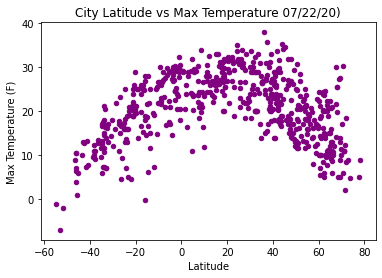

In [217]:
city_data_new.plot(kind='scatter', x='Latitude', y='Max Temperature', c='purple')
plt.title('City Latitude vs Max Temperature {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Images/LatitudeVsTemperature.png')


## Latitude vs. Humidity Plot

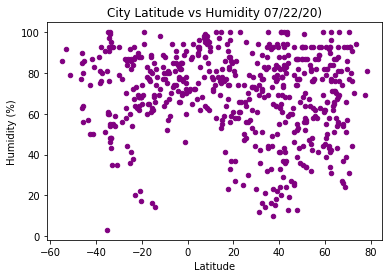

In [219]:
city_data_new.plot(kind='scatter', x='Latitude', y='Humidity', c='purple')
plt.title('City Latitude vs Humidity {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Images/LatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

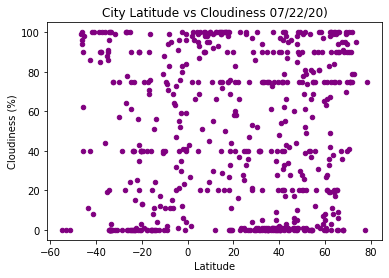

In [220]:
city_data_new.plot(kind='scatter', x='Latitude', y='Cloudiness', c='purple')
plt.title('City Latitude vs Cloudiness {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/LatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

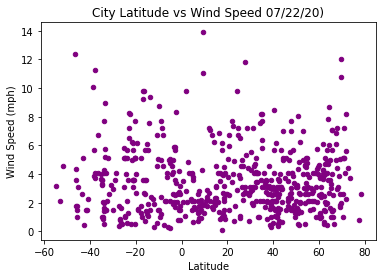

In [221]:
city_data_new.plot(kind='scatter', x='Latitude', y='Wind Speed', c='purple')
plt.title('City Latitude vs Wind Speed {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/LatitudeVsWind Speed.png')

## Linear Regression

In [254]:
# OPTIONAL: Create a function to create Linear Regression plots
#Linear regression equation Y = a + bX
def linear_regression_plot(df,title_name,y_column_name,y_label,file_name,xy):
    x_value = df['Latitude']
    y_value = df[y_column_name]
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
    regression_values = x_value * slope + intercept
    line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regression_values,'r-')
    plt.xlabel('Latiude')
    plt.ylabel(y_label)
    plt.annotate(line_equation,xy,fontsize=15,color='red')
    plt.title(title_name)
    
    print(f'The r-squared is: {rvalue}')
    plt.savefig('Images/file_name')

In [258]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] >= 0]
southern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.5944236303241514


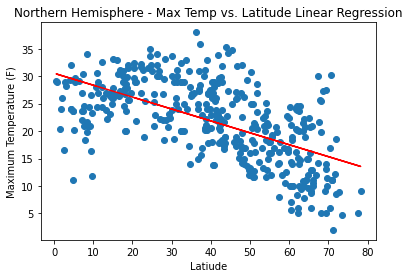

In [259]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_northern.png',
                       (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.756275535906761


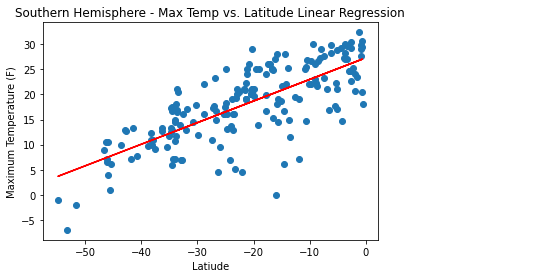

In [260]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_southern.png',
                       (10,0))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.1153848222552355


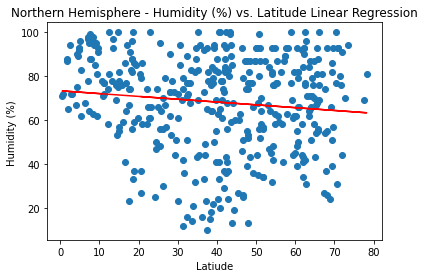

In [263]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%) ',
                       'Images/HumidityVsLatLinRegress_northern.png',
                       (10,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07158610805750569


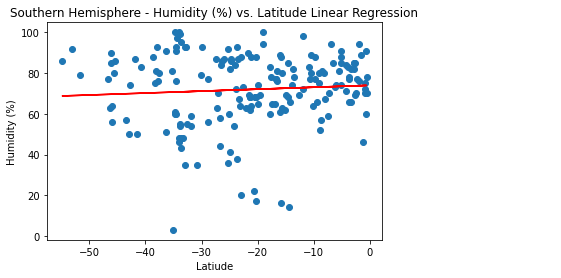

In [264]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%)',
                       'Images/HumidityVsLatLinRegress_southern.png',
                       (10,0))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08520965379768007


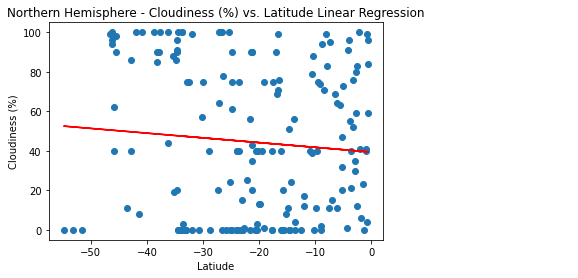

In [266]:
linear_regression_plot(southern_hemisphere_df,
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_Northern.png',
                       (10,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08520965379768007


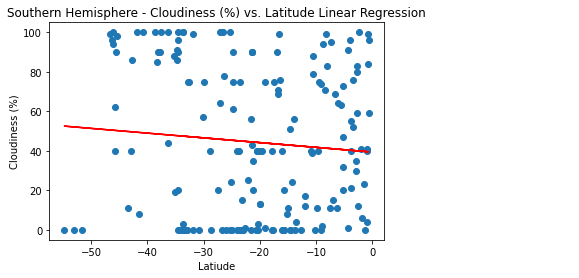

In [267]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_southern.png',
                       (10,0))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.018314531820216747


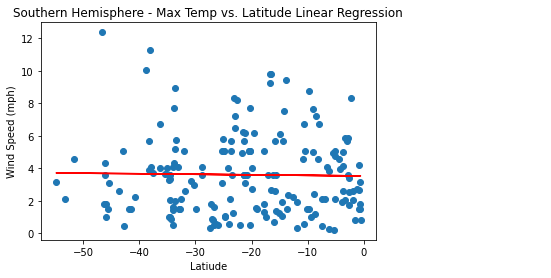

In [268]:
linear_regression_plot(southern_hemisphere_df,
                       'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_northern.png',
                       (10,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.018314531820216747


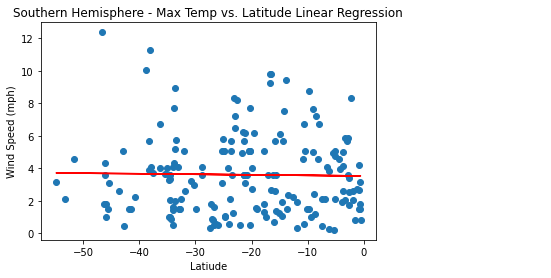

In [269]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_southern.png',
                       (10,0))